In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
os.chdir('V:/UTD/python/Assignment 3')

In [83]:
SN_ads = pd.read_csv('Social_Network_Ads.csv')

SN_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


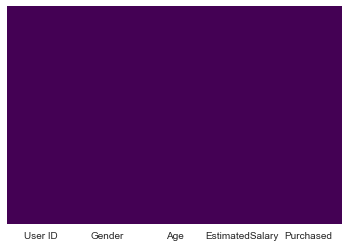

In [73]:
sns.heatmap(SN_ads.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no missing values in the data

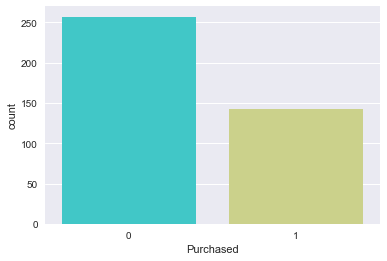

In [74]:
sns.countplot(x='Purchased',data=SN_ads,palette='rainbow')

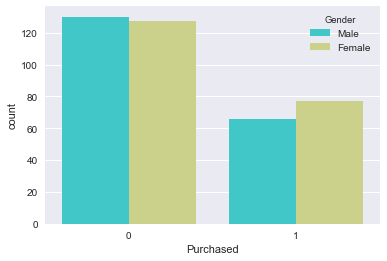

In [75]:
sns.countplot(x='Purchased',hue='Gender',data=SN_ads,palette='rainbow')

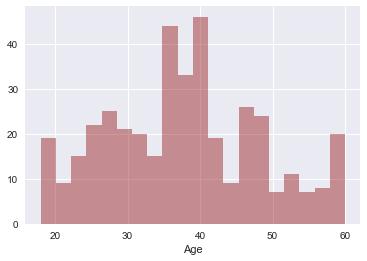

In [76]:
sns.distplot(SN_ads['Age'].dropna(),kde=False,color='darkred',bins=20)

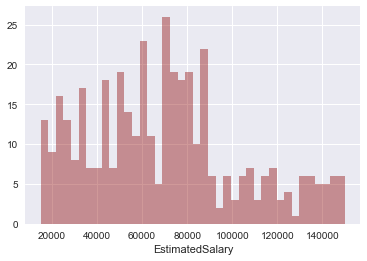

In [77]:
sns.distplot(SN_ads['EstimatedSalary'].dropna(),kde=False,color='darkred',bins=40)

EstimatedSalary column is positively skewed. Log transformation on this column could give better results

# Creating dummy variables for categorical features and log transformation for EstimatedSalary

In [101]:
SN_ads = pd.read_csv('Social_Network_Ads.csv')
gender = pd.get_dummies(SN_ads['Gender'],drop_first=True)

SN_ads_new = SN_ads

In [102]:
SN_ads_new['log_Est_sal'] = np.log(SN_ads_new['EstimatedSalary'])
SN_ads_new.drop(['Gender','User ID','EstimatedSalary'],axis=1,inplace=True)
SN_ads_new.head()

,Age,Purchased,log_Est_sal
0,19,0,9.852194
1,35,0,9.903488
2,26,0,10.668955
3,27,0,10.950807
4,19,0,11.238489


In [103]:
SN_ads_new = pd.concat([SN_ads_new,gender],axis=1)
SN_ads_new.head()

,Age,Purchased,log_Est_sal,Male
0,19,0,9.852194,1
1,35,0,9.903488,1
2,26,0,10.668955,0
3,27,0,10.950807,0
4,19,0,11.238489,1


# Logistic model

In [48]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(SN_ads_new.drop('Purchased',axis=1), 
                                                    SN_ads_new['Purchased'], test_size=0.35, 
                                                    random_state=99)

In [64]:
# sns.countplot(x='Y_test',data=Y_test,palette='rainbow')

# Model building & prediction

In [50]:
from sklearn.linear_model import LogisticRegression

In [105]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

# Model Evaluation

In [53]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86        97
          1       0.70      0.60      0.65        43

avg / total       0.79      0.80      0.80       140



Before the log transformation, precision was 0.69. Transformation improved the accuracy by 10%

In [37]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(predictions, Y_test)

array([[86, 17],
       [11, 26]], dtype=int64)

# End of the assignment